Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2017/2018  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 30. listopada 2017.*

(c) 2015-2017 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. listopada 2017.**  
Rok za predaju: **6. studenog 2017. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [25]:
# Učitaj osnovne biblioteke...
import sklearn
import mlutils
import matplotlib.pyplot as plt
import numpy as np
%pylab inline


Populating the interactive namespace from numpy and matplotlib


C:\Users\Filip\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['positive', 'negative', 'poly', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [26]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.02  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [27]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

[1 1 1 1 0 0 0]
[[-0.5 -0.1]]
1.0


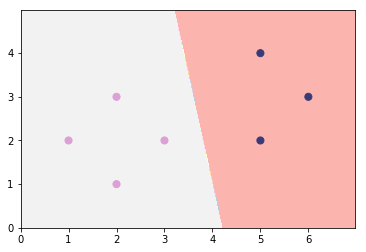

In [28]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
positive = np.array([vect[1] for vect in enumerate(seven_X) if seven_y[vect[0]]==1])
negative = np.array([vect[1] for vect in enumerate(seven_X) if seven_y[vect[0]]==0])
#plt.scatter(np.array([vect[0] for vect in positive]), np.array([vect[1] for vect in positive]), label='positive')
#plt.scatter(np.array([vect[0] for vect in negative]), np.array([vect[1] for vect in negative]), label='negative')
#plt.legend('loc=best')
clf = sklearn.linear_model.RidgeClassifier(alpha=0, fit_intercept=True)
clf.fit(seven_X, seven_y)
print(clf.predict(seven_X))
print(clf.coef_)
plot_2d_clf_problem(seven_X, seven_y, h = (lambda x: clf.predict(x)>=0.5))
accuracy = accuracy_score(seven_y, clf.predict(seven_X))
print(accuracy)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

[-0.25 -0.05]


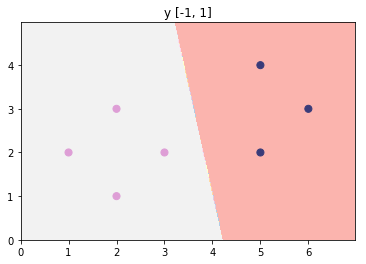

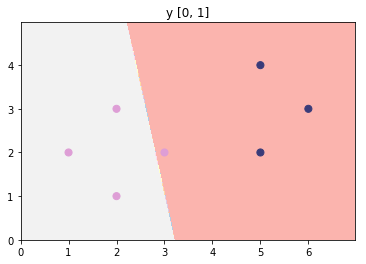

In [29]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
clf = sklearn.linear_model.LinearRegression(fit_intercept=True)
model = clf.fit(seven_X, seven_y)
print(model.coef_)
plt.figure()
plot_2d_clf_problem(seven_X, seven_y, h = (lambda x: clf.predict(x) >= 0.5))
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])
plt.title('y [-1, 1]')
plt.figure()
clf.fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, h = (lambda x: clf.predict(x) >= 0.5))
plt.title('y [0, 1]')
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [30]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)
print(outlier_X, outlier_y)

[[ 2  1]
 [ 2  3]
 [ 1  2]
 [ 3  2]
 [ 5  2]
 [ 5  4]
 [ 6  3]
 [12  8]] [1 1 1 1 0 0 0 0]


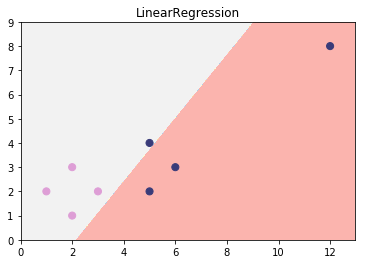

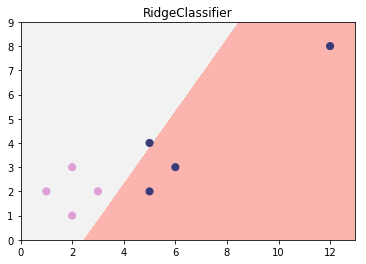

In [31]:
clf = sklearn.linear_model.LinearRegression(fit_intercept=True)
clr = sklearn.linear_model.RidgeClassifier(fit_intercept=True)
clf.fit(outlier_X, outlier_y)
clr.fit(outlier_X, outlier_y)
plt.figure()
plot_2d_clf_problem(outlier_X, outlier_y, h = (lambda x: clf.predict(x) >= 0.5))
plt.title('LinearRegression')
plt.figure()
plot_2d_clf_problem(outlier_X, outlier_y, h= (lambda x: clr.predict(x) >= 0.5))
plt.title('RidgeClassifier')

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [32]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

<function <lambda> at 0x000002E7CBAB99D8>


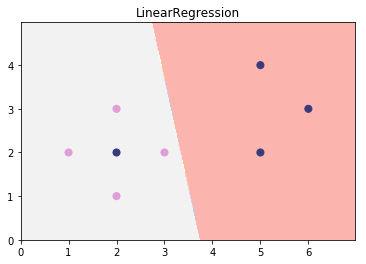

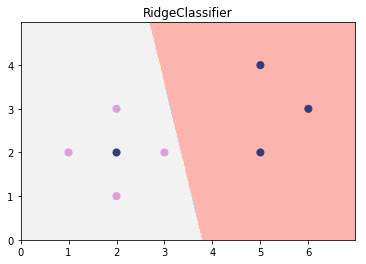

In [33]:
clf = sklearn.linear_model.LinearRegression(fit_intercept=True)
clr = sklearn.linear_model.RidgeClassifier(fit_intercept=True)
clf.fit(unsep_X, unsep_y)
clr.fit(unsep_X, unsep_y)
plt.figure()
plot_2d_clf_problem(unsep_X, unsep_y, h = (lambda x: clf.predict(x) >= 0.5))
print((lambda x: clf.predict(x) >= 0.5))
plt.title('LinearRegression')
plt.figure()
plot_2d_clf_problem(unsep_X, unsep_y, h= (lambda x: clr.predict(x) >= 0.5))
plt.title('RidgeClassifier')
# U ovoj situaciji problem je u podacima ali i u modelu. Podaci  nisu linearno odvojivi, sto znaci da nam treba
# slozeniji model (odnosno drugacija hipoteza) kako bi ispravno klasificirali te podatke

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

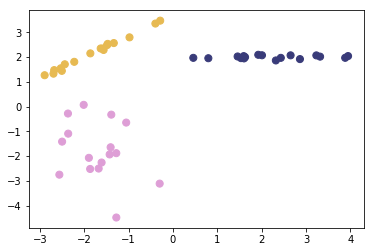

In [34]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 50, n_features = 2, n_redundant=0, n_classes=3, n_clusters_per_class = 1, class_sep=2)
clf = sklearn.linear_model.RidgeClassifier(fit_intercept=True)
clf.fit(X,y)
plot_2d_clf_problem(X, y)
#print(X, y)

w = clf.fit(X,y).coef_
#print(w)
#help(plot_2d_clf_problem)

y1 = [1 if y==0 else 0 for y in y]
y2 = [1 if y==1 else 0 for y in y]
y3 = [1 if y==2 else 0 for y in y]
def h(x,w): return np.dot(x,w)
def plot_decision_boundary(h, boundary=0, margins=None):
    x = linspace(-10, 10)
    y = linspace(-10, 10)
    X1, X2 = np.meshgrid(x, y)
    XX = sp.dstack((sp.ones((50, 50)), X1, X2))
    plt.contour(X1, X2, h(XX), linecolor='red', levels=[boundary])
    if margins!=None:
        CS = plt.contour(X1, X2, h(XX), colors=['gray', 'gray'], levels=[margins[0],margins[1]])
        plt.clabel(CS, fontsize=9, inline=1)
        
def get_linear_regression_weights(X, y, degree=1):
    poly = sklearn.polynomialFeatures(degree)
    X_ = poly.fit(X)
    clf = sklearn.linear_model.linearRegression(fit_intercept=True)
    coeffs = np.array(clf.fit(X_, y).coefs_)
    return np.weights()


Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

(50, 3) [0.40902032205747885, array([ 0.2081051 ,  0.01613324])]
Ridge regression accuracy 1.0
OVR classification accuracy 1.0


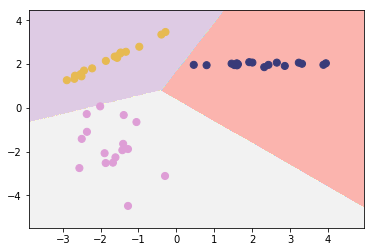

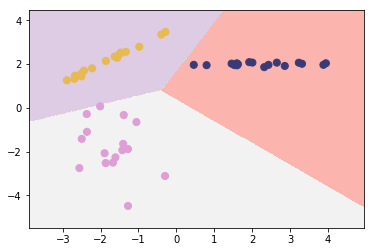

In [35]:
def h1(X,w): return np.dot(X,w)
clr = sklearn.linear_model.RidgeClassifier()
clr.fit(X, y)


clf1 = sklearn.linear_model.LinearRegression()
clf1.fit(X,y1)
coeff1 = [clf1.intercept_, clf1.coef_]
intercept1 = clf1.intercept_
clf2 = sklearn.linear_model.LinearRegression()
clf2.fit(X,y2)
coeff2 = [clf2.intercept_, clf2.coef_]
clf3 = sklearn.linear_model.LinearRegression()
clf3.fit(X,y3)
coeff3= [clf3.intercept_, clf3.coef_]

poly = sklearn.preprocessing.PolynomialFeatures(1)
Phi = poly.fit_transform(X)
print(Phi.shape, [coeff1[0], coeff1[1]])
# hypothesis = w.T * x (x dim = N x 3, w dim = 1 x 3 or 3 x 1)
def h(x,w): return np.dot(w[1:], x) + w[0]
#print(X)
#h1 = h(X, np.array([coeff1[0], coeff1[1]]))
#print(h1.shape)

h1 = lambda x: h(x, coeff1)
h2 = lambda x: h(x, coeff2)
h3 = lambda x: h(x, coeff3)


def predict(x):
    return np.argmax([h1(x), h2(x), h3(x)])

plt.figure()
plot_2d_clf_problem(X, y, lambda x: predict(x))
plt.figure()
plot_2d_clf_problem(X, y, lambda x: clr.predict(x))
print('Ridge regression accuracy {}'.format(accuracy_score(y, clr.predict(X))))
print('OVR classification accuracy {}'.format(accuracy_score(y, [predict(x) for x in X])))

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

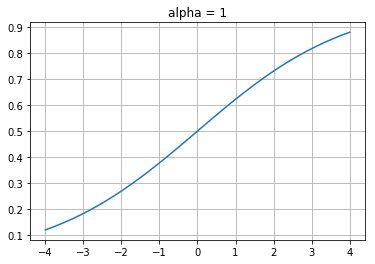

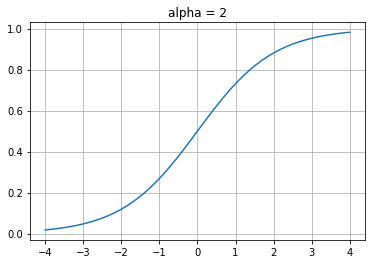

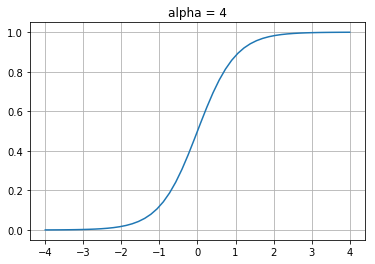

In [36]:
def sigm(x, alpha): return (1/(1+exp(-alpha*x)))

plt.figure()
plt.plot(linspace(-4,4), sigm(linspace(-2,2),1))
plt.grid()
plt.title('alpha = 1')
plt.figure()
plt.plot(linspace(-4,4), sigm(linspace(-2,2),2))
plt.grid()
plt.title('alpha = 2')
plt.figure()
plt.plot(linspace(-4,4), sigm(linspace(-2,2),4))
plt.grid()
plt.title('alpha = 4')

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [37]:
X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
y = np.array([1, 1, 1, 1, 0, 0, 0])

def h(x,w, alpha=0.5):
    """Hypothesis for a logistic regresion, sigmoid function squashes linear regression output"""
    return sigm(np.dot(x,w), alpha)

def lr_h(x,w):
    """Predict function for classifying examples"""
    lista = []
    for i in h(x,w):
        if i >0.5:
            lista.append(1)
        else:
            lista.append(0)
    return np.array(lista)

def cross_entropy_error(X, y, w):
    """Error function, sum through all examples and compare them to the truthful classification and get error"""
    error = 0
    for i in range(0, X.shape[0]):
        error = error -(y[i]*np.log(h(X[i,:],w)+0.00001)) - (1-y[i])*np.log(1-h(X[i, :],w)+0.00001)        
    return error

def classification_error(X, y, w):
    error = 0
    for i in range(0, X.shape[0]):
        error = error + abs(y[i]-(lr_h(X, w))[i])
    return error

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    """ Function that applies gradient descend in order to find weights for logistic regression"""
    poly = sklearn.preprocessing.PolynomialFeatures(1)
    X_ = poly.fit_transform(X)
    w = np.zeros(X_.shape[1])
    delta_w = np.zeros(X_.shape[1])
    iter_count = 0
    w_history = []
    while True:
        for i in range(0, X.shape[0]):
            h1 = h(X_[i,:], w)
            delta_w = delta_w + np.dot((h1-y[i]), X_[i,:])
        iter_count += 1
        w = w - eta*delta_w
        if trace:
            w_history.append(w)
        if iter_count >= max_iter or cross_entropy_error(X_,y,w)<epsilon:
            break
    if trace:    
        return w, np.array(w_history)
    else:
        return w            


#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

9.6010458495116382e-05

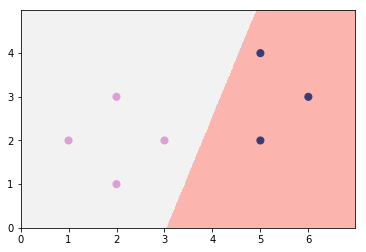

In [38]:
import scipy as sp
X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
y = np.array([1, 1, 1, 1, 0, 0, 0])
poly = sklearn.preprocessing.PolynomialFeatures(1)
X_ = poly.fit_transform(X)
w = lr_train(X, y, alpha=0.5)
plot_2d_clf_problem(X, y, h = (lambda x: h(poly.fit_transform(x), w) > 0.5))
cross_entropy_error(X_, y, w)
# Aktivan je kriterij zaustavljanja maksimalne iteracije 
# Pogreška entropije nije jedaka nuli nego nan(??? Zašto??)
# kod bi preiacio na nacin da bi morao slucajno permutirati primjere u skupu za ucenje iisto tako bi morao osvjezavanje
# samih tezina cesce raditi 

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

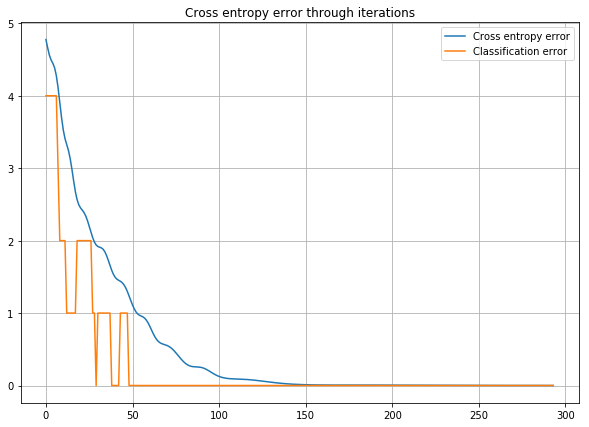

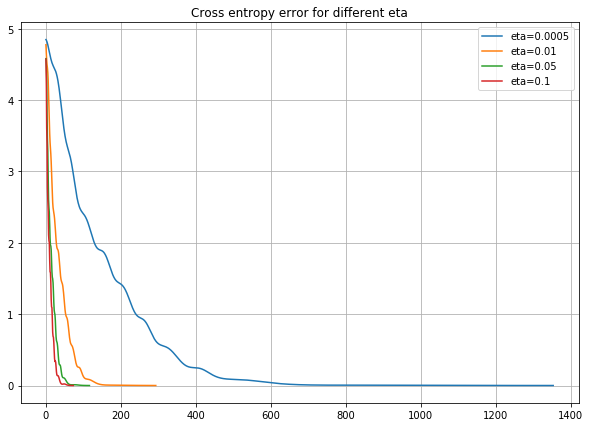

In [39]:
w , w_hist = lr_train(X, y, trace=True)
poly = sklearn.preprocessing.PolynomialFeatures(1)
X_ = poly.fit_transform(X)
errors = []
class_error = []
# TO DO: Prikazati na istom grafu i pogresku klasifikacije
# define zero_one loss
for i in w_hist:
    errors.append(cross_entropy_error(X_, y, i))
    class_error.append(classification_error(X_, y, i))
plt.figure(figsize=(10,7))
plt.plot(range(0,  len(errors)), errors, label='Cross entropy error')
plt.plot(range(0, len(class_error)), class_error, label='Classification error')
plt.grid()
plt.title('Cross entropy error through iterations')
plt.legend(loc='best')

eta = [0.0005, 0.01, 0.05, 0.1]
w_hist_dict = {}
errors = {}
class_error = {}
plt.figure(figsize=(10,7))
plt.grid()
for i in eta:
    w_hist_dict['{}'.format(i)] = lr_train(X, y, trace=True, eta=i)[-1]    
    errors['{}'.format(i)] = []
    #class_error['{}'.format(i)] = []
    for j in w_hist_dict['{}'.format(i)]:
        errors['{}'.format(i)].append(cross_entropy_error(X_, y, j))
        #class_error['{}'.format(i)].append(classification_error(X_, y, j))
        
    plt.plot(range(0, len(errors['{}'.format(i)])), errors['{}'.format(i)], label = 'eta={}'.format(i))
    plt.legend(loc = 'best')
    plt.title('Cross entropy error for different eta')
    


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

[ 0.66963895 -0.66970931  0.34068875]
[1 1 1 1 0 0 0]
[ 0.37903731  0.62911684  0.73535435  0.27147197  0.04759353  0.12193539
  0.0296031 ]


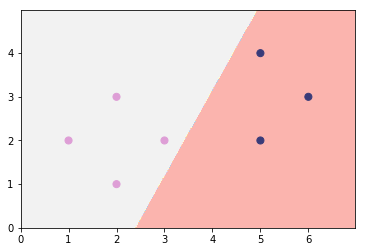

In [40]:
from sklearn.linear_model import LogisticRegression

X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
y = np.array([1, 1, 1, 1, 0, 0, 0])
poly = sklearn.preprocessing.PolynomialFeatures(1)
X_ = poly.fit_transform(X)

lr = LogisticRegression()
lr.fit(X_,y)

w = lr.coef_[0]
print(w)
print(lr.predict(X_))
print(h(poly.fit_transform(X), w, alpha=1.5))

plot_2d_clf_problem(X, y, h = (lambda x: h(poly.fit_transform(x), w, alpha=1.5) > 0.2))

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

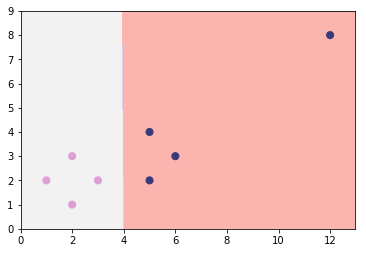

In [41]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
seven_y = np.array([1,1,1,1,0,0,0])
outlier_y = np.append(seven_y, 0)
lr = LogisticRegression(tol = 0.00001, max_iter=1000, C=1e10)
lr.fit(outlier_X, outlier_y)
#print(lr.predict(outlier_X))
w = lr.coef_[0]

plot_2d_clf_problem(outlier_X, outlier_y, h = (lambda x: lr.predict(x)))

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


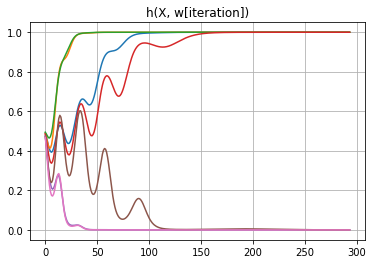

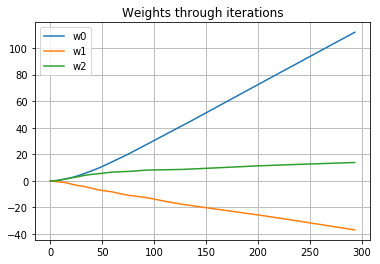

In [42]:
w, w_hist = lr_train(seven_X, seven_y, trace=True)

poly = sklearn.preprocessing.PolynomialFeatures(1)
def h(x,w, alpha=0.5): 
    return sigm(np.dot(x,w),alpha)
    
def predict(X,w, alpha=0.5):
    prediction = []
    for x in X:
        if h(x,w) > 0.5:
            prediction.append(1)
        else:
            prediction.append(0)
    return np.array(prediction)
H = []
for i in w_hist:
    H.append(h(poly.fit_transform(X), i))
plt.plot(range(0, len(H)),H)
plt.title('h(X, w[iteration])')
plt.grid()
plt.figure()
plt.plot(range(0, len(w_hist)), w_hist[:, 0], label='w0')
plt.plot(range(0, len(w_hist)), w_hist[:, 1], label='w1')
plt.plot(range(0, len(w_hist)), w_hist[:, 2], label='w2')
plt.legend(loc='best')
plt.grid()
plt.title('Weights through iterations')

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

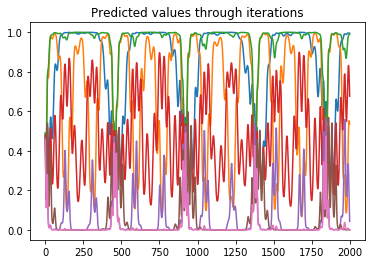

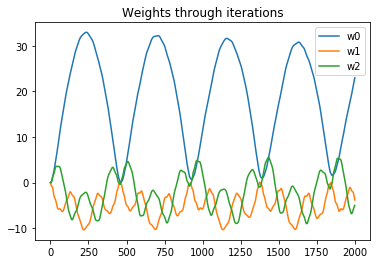

In [43]:
w, w_hist = lr_train(unsep_X, unsep_y, trace=True)
poly = sklearn.preprocessing.PolynomialFeatures(1)
def h(x,w, alpha=0.5): 
    return sigm(np.dot(x,w),alpha)
    
def predict(X,w, alpha=0.5):
    prediction = []
    for x in X:
        if h(x,w) > 0.5:
            prediction.append(1)
        else:
            prediction.append(0)
    return np.array(prediction)
H = []
plt.figure()
for i in w_hist:
    H.append(h(poly.fit_transform(X), i))
plt.plot(range(0, len(H)),H)
plt.title('Predicted values through iterations')
plt.figure()
plt.plot(range(0, len(w_hist)), w_hist[:, 0], label='w0')
plt.plot(range(0, len(w_hist)), w_hist[:, 1], label='w1')
plt.plot(range(0, len(w_hist)), w_hist[:, 2], label='w2')
plt.title('Weights through iterations')
plt.legend(loc='best')

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [44]:
from numpy.linalg import norm

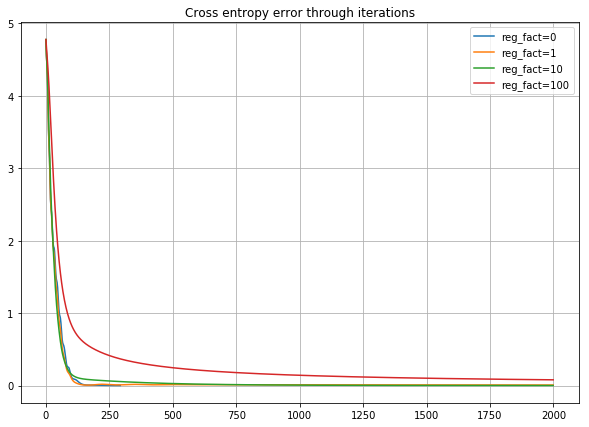

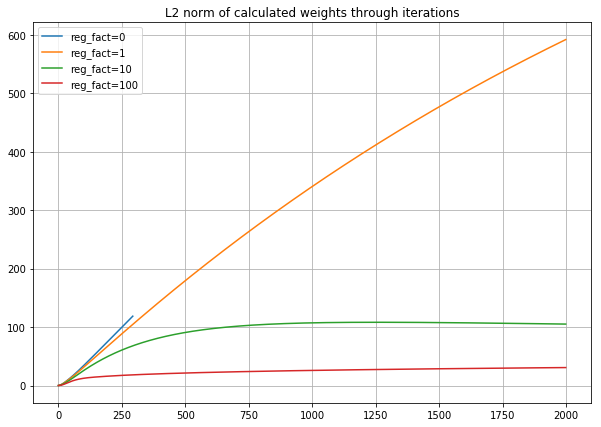

In [45]:
X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
y = np.array([1, 1, 1, 1, 0, 0, 0])
poly = sklearn.preprocessing.PolynomialFeatures(1)
def lr_reg_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False, reg_fact=0):
    """ Function that applies gradient descend in order to find weights for logistic regression"""
    poly = sklearn.preprocessing.PolynomialFeatures(1)
    X_ = poly.fit_transform(X)
    w = np.zeros(X_.shape[1])
    w0 = 0
    delta_w = np.zeros(X_.shape[1])
    delta_w0 = 0
    iter_count = 0
    w_history = []
    while True:
        for i in range(0, X_.shape[0]):
            h1 = h(X_[i,:], w)
            delta_w = delta_w + np.dot((h1-y[i]), X_[i,:])
            delta_w0 = delta_w0 + (h1 - y[i])
        iter_count += 1
        w = w*(1-eta*reg_fact) - eta*delta_w
        w0 = w0 - eta*delta_w0 
        w[0] = w0
        if trace:
            w_history.append(w)
        if iter_count >= max_iter or cross_entropy_error(X_,y,w)<epsilon:
            break
    if trace:    
        return w, np.array(w_history)
    else:
        return w

weights = {}
errors = {}
norms = {}
reg_facts = [0, 1, 10, 100]
plt.figure(figsize=(10,7))
for i in reg_facts:
    w_hist_dict['{}'.format(i)] = lr_reg_train(X, y, trace=True, reg_fact=i)[-1]    
    errors['{}'.format(i)] = []
    norms['{}'.format(i)] = []
    for j in w_hist_dict['{}'.format(i)]:
        errors['{}'.format(i)].append(cross_entropy_error(poly.fit_transform(X), y, j))
    norms['{}'.format(i)] = np.array(list(map(lambda x: norm(x), w_hist_dict['{}'.format(i)])))
    plt.plot(range(0, len(errors['{}'.format(i)])), errors['{}'.format(i)], label='reg_fact={}'.format(i))
    plt.legend(loc='best')
plt.grid()
plt.title('Cross entropy error through iterations')
    
plt.figure(figsize(10,7))    
for i in reg_facts:
    plt.plot(range(0, len(norms['{}'.format(i)])), norms['{}'.format(i)], label='reg_fact={}'.format(i))
    plt.legend(loc='best')
plt.grid()
plt.title('L2 norm of calculated weights through iterations')


### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [46]:
from sklearn.preprocessing import PolynomialFeatures


X,y = make_classification(n_samples = 100 , n_features = 2, n_redundant=0, n_classes=2, n_clusters_per_class = 2, class_sep=2)
#poly = PolynomialFeatures(2)
def train_lr_function(X, y, degree=1, interaction_only=False):
    poly = PolynomialFeatures(degree, interaction_only)
    lr = LogisticRegression()
    print(poly.fit_transform(X).shape)
    lr.fit(poly.fit_transform(X) , y)
    print(lr.coef_.shape)
    return lr.coef_


(100, 6)
(1, 6)
[-0.55032817  2.27613342  0.01783691  0.1610939  -0.00487252  0.10773871]
(100, 10)
(1, 10)
[-0.65728612  0.41516551 -0.06738282  0.01003235  0.18741516 -0.08258356
  0.67563335  0.03617214  0.46393611 -0.0121288 ]


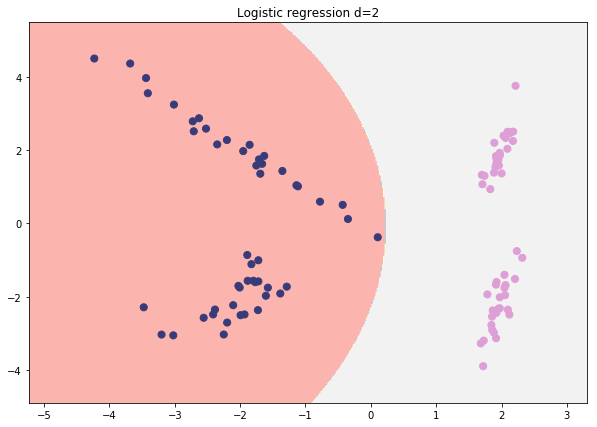

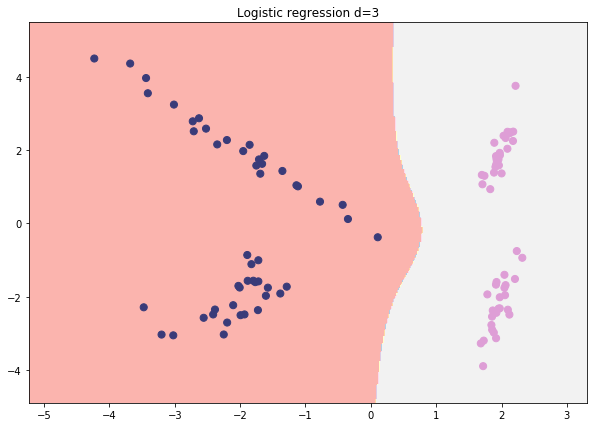

In [47]:
weights = train_lr_function(X, y, degree=2)
poly = PolynomialFeatures(2)
print(weights[0])
plot_2d_clf_problem(X,y, h = (lambda x: h(poly.fit_transform(x), weights[0].T)>0.5))
plt.title('Logistic regression d=2')
weights = train_lr_function(X, y, degree=3)
poly1 = PolynomialFeatures(3)
print(weights[0])
plt.figure()
plot_2d_clf_problem(X,y, h = (lambda x: h(poly1.fit_transform(x), weights[0].T)>0.5))
plt.title('Logistic regression d=3')

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?